In [5]:
# !pip install shapely geopandas matplotlib              # <-----use to install shapely
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# https://www.kaggle.com/datasets/adrianjuliusaluoch/global-food-prices

# Load CSV file into a DataFrame
df = pd.read_csv("Global WFP Food Prices.csv")

# Clean & prepare the date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

df.head()

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 11.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ----------------------------------- ---- 20.4/22.9 MB 101.8 MB/s eta 0:00:01
   ---------------------------------------  22.8/22.9 MB 103.1 MB/s eta 0:00:01
   ---------------------------------------- 22.9/22.9 MB 51.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 36.1 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [s

,country_code,date,county,subcounty,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,price_flag,price_type,currency,local_price,price_usd
0,AFG,2000-01-15,Badakhshan,Faiz Abad,Fayzabad,266,37.12,70.58,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,150000.00,3205.81
1,AFG,2000-01-15,Balkh,Mazar-e-Sharif,Mazar,267,36.73,67.11,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,100000.00,2137.21
2,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Bread,55,KG,actual,Retail,AFN,15.63,0.33
3,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat,84,KG,actual,Retail,AFN,9.13,0.20
4,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat flour,58,KG,actual,Retail,AFN,10.06,0.22


In [2]:
print(df["country_code"].value_counts())
print("\n")
print(df["date"].value_counts())
print("\n")

country_code
IDN    190285
SYR    167871
IND    135524
PHL    133554
GMB    125937
        ...  
CRI       330
VNM       311
AZE       125
ERI       100
GEO        80
Name: count, Length: 99, dtype: int64


date
2021-03-15    35494
2021-04-15    35030
2021-02-15    34706
2021-01-15    34118
2023-07-15    33814
              ...  
2000-10-15      272
2000-07-15      269
2000-03-15      259
2000-02-15      253
2000-01-15      251
Name: count, Length: 309, dtype: int64




In [3]:
print(df["category"].value_counts())
print("\n")
print(df["commodity"].value_counts())
print("\n")
print(df["currency"].value_counts())

category
cereals and tubers       1086101
vegetables and fruits     515493
meat, fish and eggs       458452
pulses and nuts           324426
non-food                  232344
miscellaneous food        214576
oil and fats              201330
milk and dairy             76895
Name: count, dtype: int64


commodity
Sugar                     77766
Rice (imported)           70944
Millet                    68740
Maize                     63464
Rice                      62230
                          ...  
Beans (haricot, red)          1
Ginger (local)                1
Fish (tilapia, fresh)         1
Sorghum (biofortified)        1
Wheat flour (Turkey)          1
Name: count, Length: 860, dtype: int64


currency
XOF    415095
IDR    190285
SYP    167871
INR    135524
PHP    133554
        ...  
PRB       187
AZN       125
ERN       100
GEL        80
VEF        75
Name: count, Length: 87, dtype: int64


# Dean: Where was this data taken from?

In [6]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf = GeoDataFrame(df, geometry=geometry)


url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)
# drop Antarctica
world = world.drop(world.loc[world['SOV_A3'] == 'ATA'].index)

Text(0.5, 1.0, 'Data points by latitude and longitude')

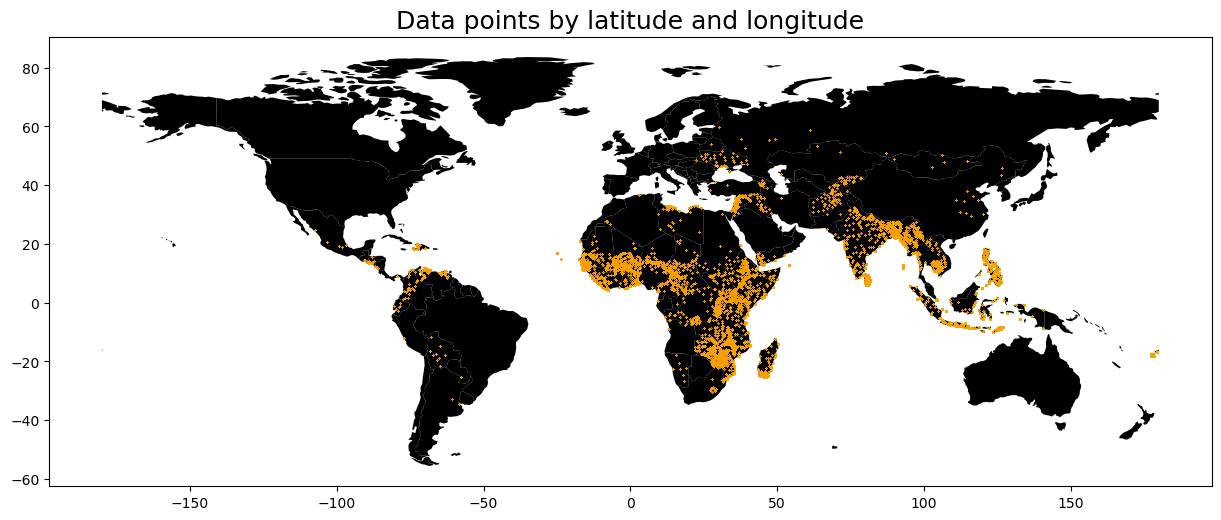

In [7]:
# plot points on map
gdf.plot(ax=world.plot(figsize=(15, 15), marker="o", color="black", markersize=0.001),
          markersize=0.01, color="orange")
plt.title("Data points by latitude and longitude",fontsize=18)

In [8]:
country_counts = df["country_code"].value_counts()
for i, row in world.iterrows():
  if row["SOV_A3"] in country_counts.index:
    world.at[i, "count"] = country_counts[row["SOV_A3"]]
  else:
    world.at[i, "count"] = 0


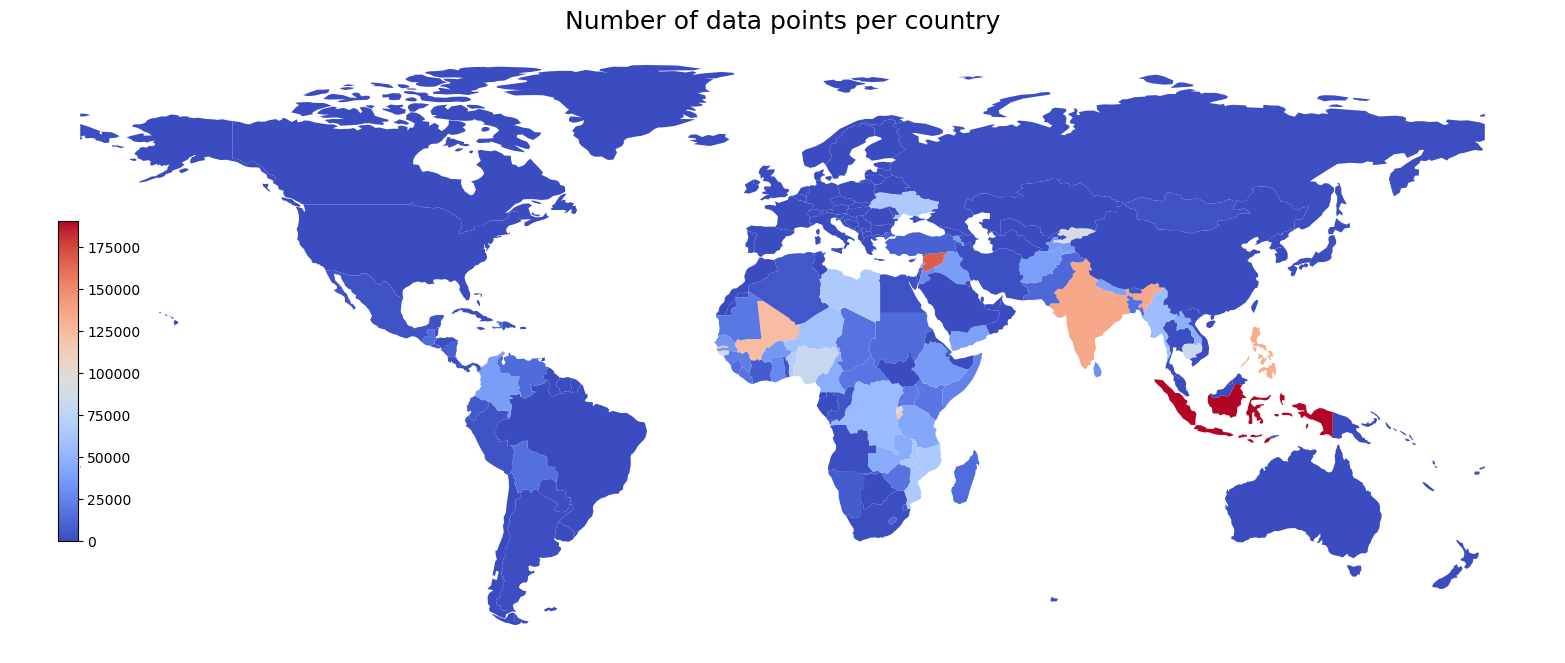

In [9]:
vmin = world["count"].min()
vmax = world["count"].max()

fig, ax = plt.subplots(1, figsize=(20, 8))
# Remove the axis
ax.axis('off')
world.plot(column="count", ax=ax, linewidth=1, cmap="coolwarm")
plt.title("Number of data points per country",fontsize=18)

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap="coolwarm")
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

# Dean: How have wages changed over time?

In [10]:
wage_df = df[df["commodity"] == "Wage (non-qualified labour, non-agricultural)"]
wage_df = wage_df[(wage_df["unit"] == "Day") | (wage_df["unit"] == "Month")]
wage_df.head(1)

,country_code,date,county,subcounty,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,price_flag,price_type,currency,local_price,price_usd
0,AFG,2000-01-15,Badakhshan,Faiz Abad,Fayzabad,266,37.12,70.58,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,150000.0,3205.81


In [11]:
wage_df = wage_df[["country_code", "date", "unit", "price_usd"]]
wage_df.head(1)

,country_code,date,unit,price_usd
0,AFG,2000-01-15,Day,3205.81


In [12]:
# we need to convert daily wages to monthly wages
# using the assumption that these daily wages are for someone who works an average of 5 days a week
# we don't know how accurate this is in these countries...
# but we have to make some assumptions to convert days to months
avg_work_days = 21.7

for i, row in wage_df.iterrows():
  if row["unit"] == "Day":
    wage_df.at[i, "wage"] = row["price_usd"] * avg_work_days
  else:
     wage_df.at[i, "wage"] = row["price_usd"]

wage_df = wage_df[["country_code", "date", "wage"]]
# remove outlier wages that don't make sense
wage_df = wage_df[wage_df["wage"] < 10000]
wage_df.head(5)

,country_code,date,wage
3445,AFG,2001-07-15,43.40
3574,AFG,2001-12-15,43.40
7108,AFG,2002-04-15,21.70
307624,COL,2013-03-15,326.39
307667,COL,2013-04-15,321.58


In [13]:
# for each country, for each date, get mean wage
wage_countries = list(wage_df["country_code"].unique())
wage_countries

['AFG', 'COL', 'PAK', 'LBR', 'MMR', 'TJK', 'TUR', 'SSD', 'MLI']

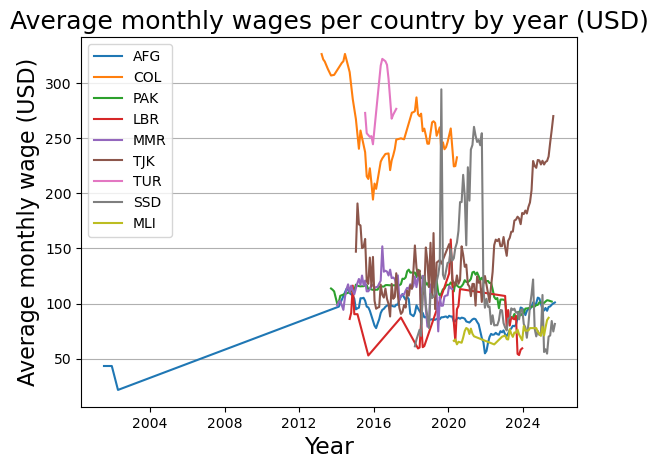

In [14]:
lines = {}
wage_dfs = {}
for country in wage_countries:
    wage_dfs[country] = wage_df[wage_df["country_code"] == country]
for country in wage_countries:
    lines[country] = wage_dfs[country].groupby("date")["wage"].mean()
    lines[country] = lines[country].sort_index()

for country in wage_countries:
    x = np.asarray(lines[country].index, dtype='datetime64[s]')
    plt.plot(x, lines[country], label=country)
plt.legend()

plt.title("Average monthly wages per country by year (USD)",fontsize=18)
plt.xlabel("Year",fontsize=17)
plt.ylabel("Average monthly wage (USD)",fontsize=16)
plt.grid(axis='y')

plt.show()

# Dean: Are there outliers in these food prices?

In [15]:
print(df["unit"].value_counts())

unit
KG        2280339
L          215704
Unit        75743
100 KG      61933
Day         30746
           ...   
180 G          27
1 Roll         16
3 pcs          11
4.5 KG          8
Godet           2
Name: count, Length: 171, dtype: int64


Let's just focus on foods priced by KGs, since they are the most common. This will let us compare prices more effectively. Let's also remove all non-food items.

In [16]:
# just KG units
kg_df = df[df["unit"] == "KG"]
# remove non food
kg_df = kg_df[kg_df["category"] != "non-food"]
# convert price_usd to float and drop nan
def f(x):
    try:
        return float(x)
    except:
        return np.nan

kg_df["price_usd"] = kg_df["price_usd"].apply(f)
kg_df = kg_df.dropna(subset=['price_usd'])

kg_df["category"].value_counts()

category
cereals and tubers       888122
vegetables and fruits    472352
meat, fish and eggs      340061
pulses and nuts          276975
miscellaneous food       184532
oil and fats              81541
milk and dairy            25018
Name: count, dtype: int64

We have 7 categories.

In [17]:
import math

cat_prices = {}
for r in kg_df.itertuples(index=False):
    cat = r.category
    price = r.price_usd
    if(cat in cat_prices):
        cat_prices[cat].append(float(price))
    else:
        cat_prices[cat] = [float(price)]

categories = list(cat_prices.keys())

for cat in categories:
    print(cat)
    print(len(cat_prices[cat]))

cereals and tubers
888122
miscellaneous food
184532
oil and fats
81541
vegetables and fruits
472352
pulses and nuts
276975
meat, fish and eggs
340061
milk and dairy
25018


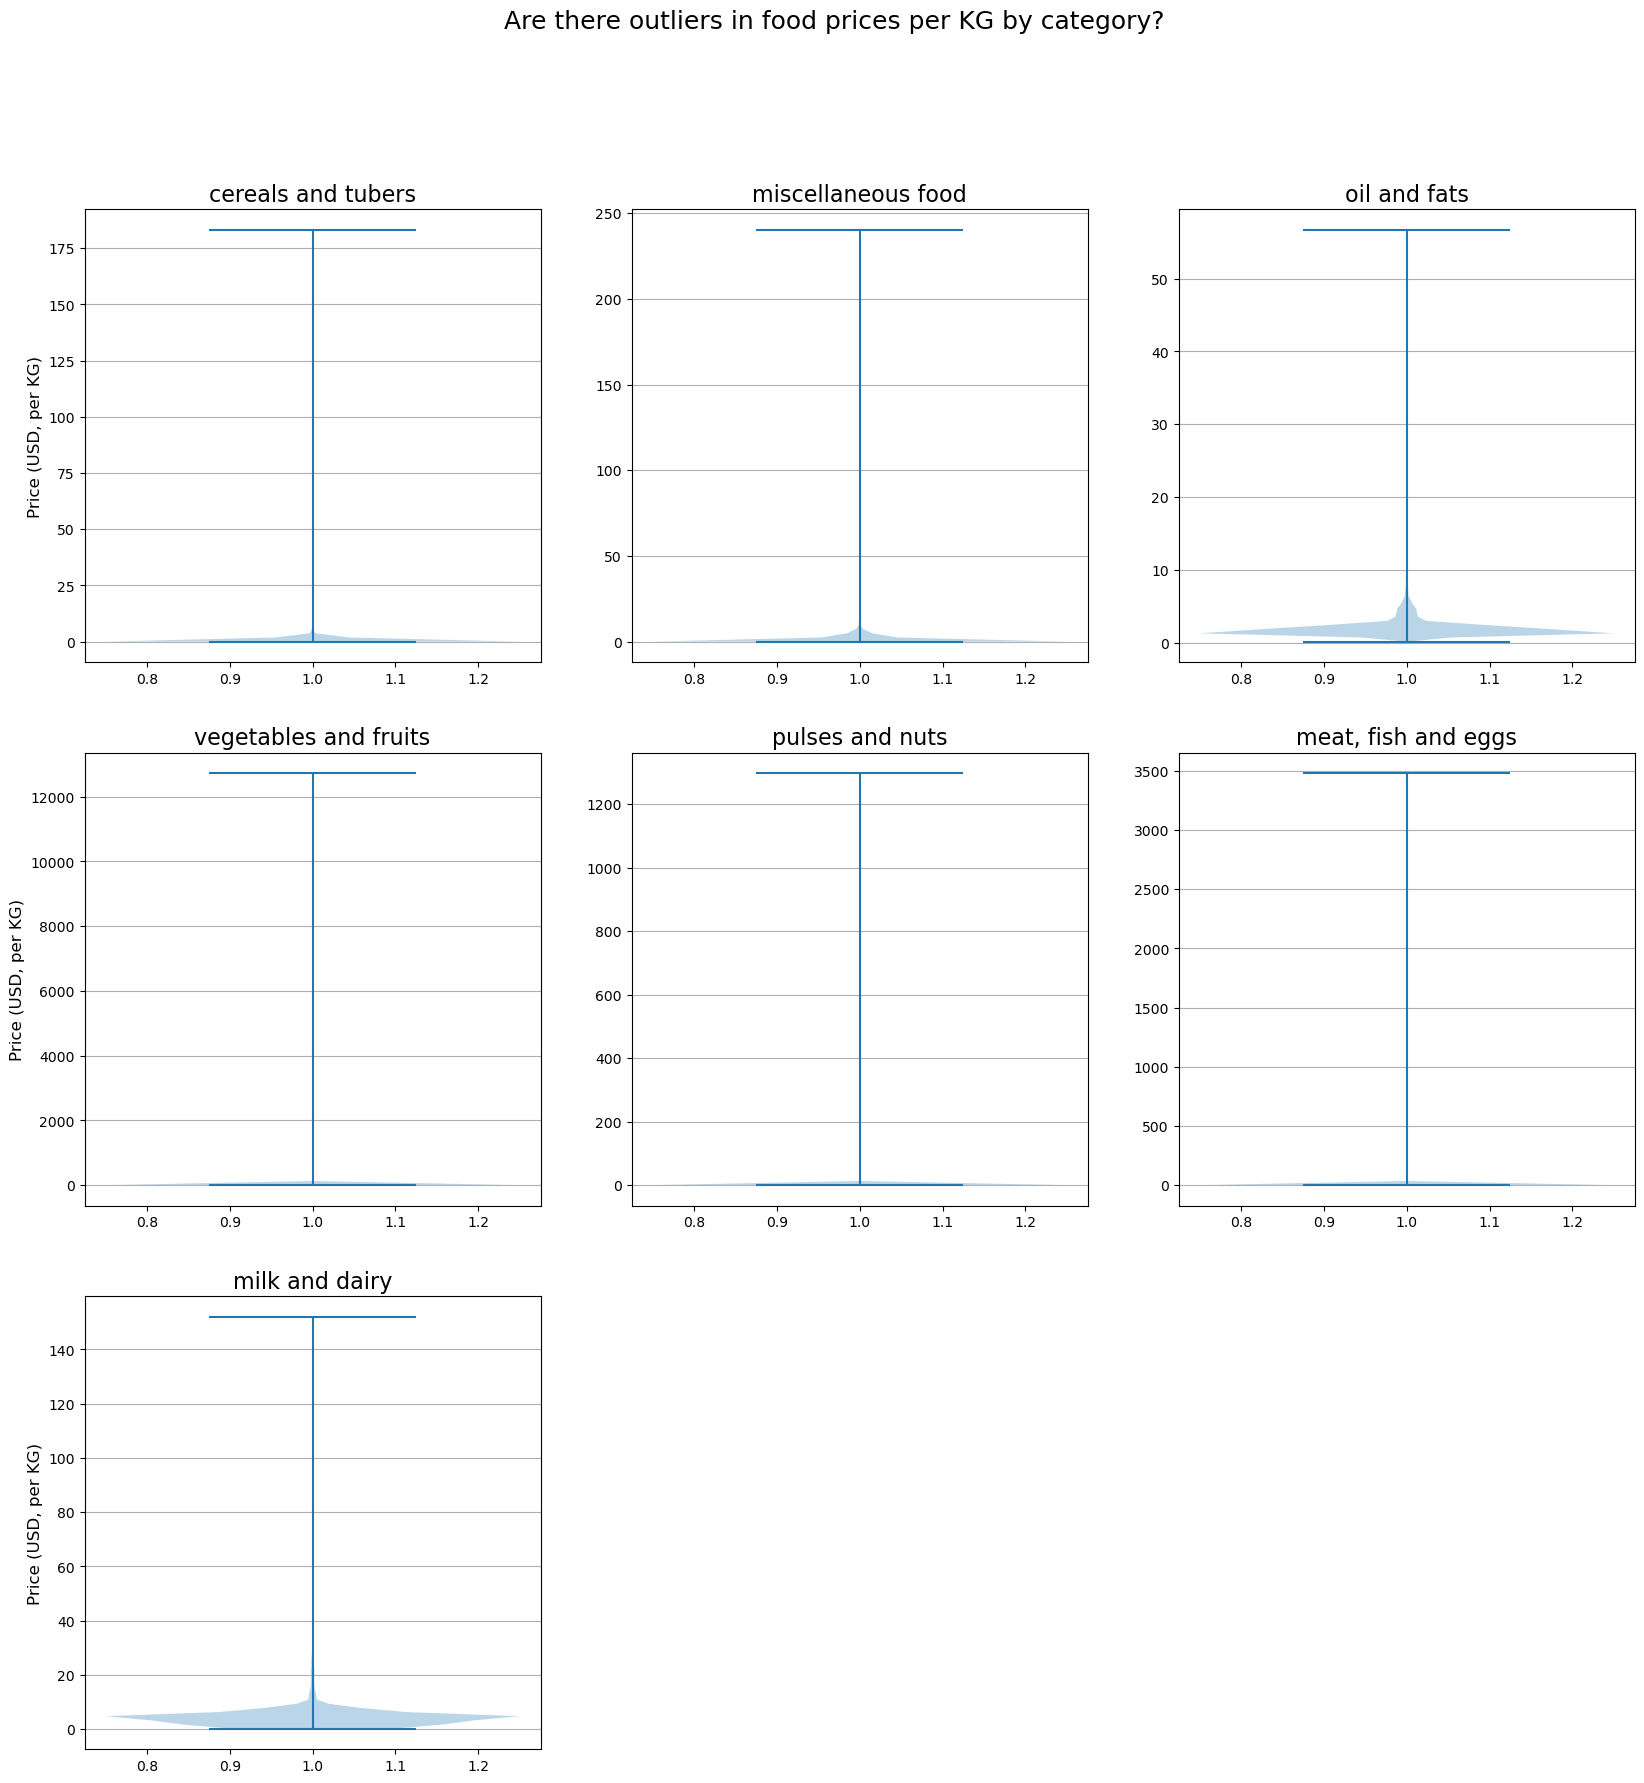

In [18]:
cols = 3
rows = math.ceil(len(categories)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

for i in range(len(categories)):
    cat = categories[i]
    c = i % cols
    r = math.floor(i/cols)
    axes[r, c].set_title(cat, fontsize="16")

    axes[r, c].violinplot(cat_prices[cat])

    if c == 0:
        axes[r, c].set_ylabel("Price (USD, per KG)", fontsize=12)

    axes[r, c].grid(axis='y')

fig.delaxes(axes[rows-1, cols-1])
fig.delaxes(axes[rows-1, cols-2])

fig.suptitle("Are there outliers in food prices per KG by category?",fontsize=18)
plt.show()

## What does this data look like after removing outliers?
We're going to use Z-score, and remove items with Z-score exceeding 3 (which seems to be standard practice).

In [19]:
from scipy import stats
cleaned_cat_prices = {}
cat_z_scores = {}

for cat in categories:
    cat_z_scores[cat] = np.abs(stats.zscore(cat_prices[cat]))

for cat in categories:
    cleaned_cat_prices[cat] = []
    prices = cat_prices[cat]
    for i in range(len(prices)):
        if cat_z_scores[cat][i] <= 3:
            cleaned_cat_prices[cat].append(prices[i])

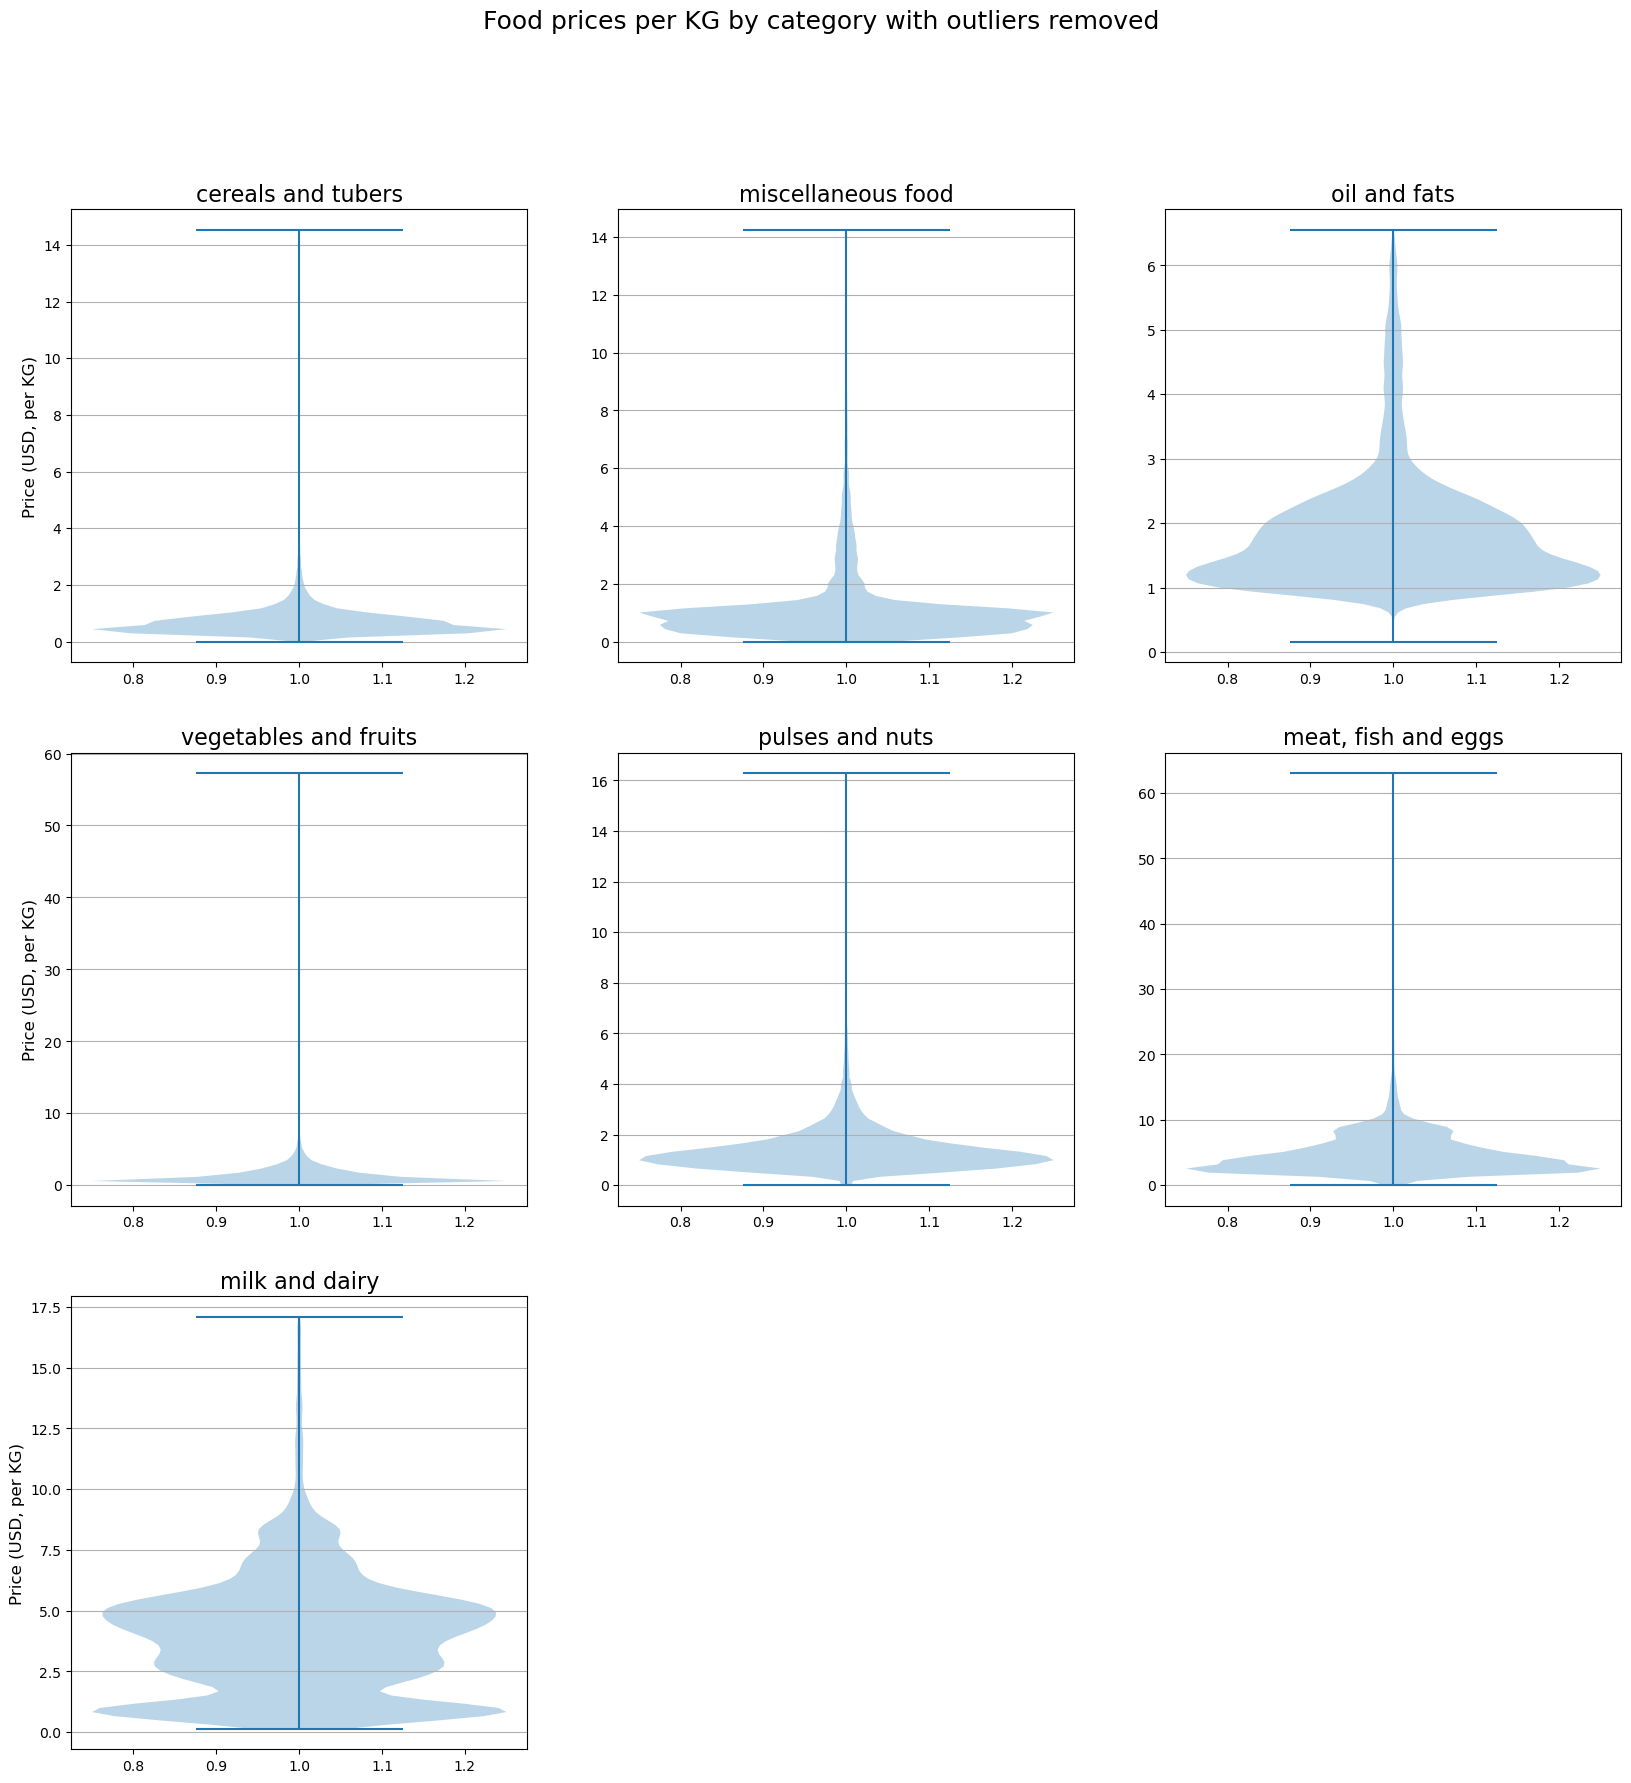

In [20]:
cols = 3
rows = math.ceil(len(categories)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

for i in range(len(categories)):
    cat = categories[i]
    c = i % cols
    r = math.floor(i/cols)
    axes[r, c].set_title(cat, fontsize="16")

    axes[r, c].violinplot(cleaned_cat_prices[cat])

    if c == 0:
        axes[r, c].set_ylabel("Price (USD, per KG)", fontsize=12)

    axes[r, c].grid(axis='y')

fig.delaxes(axes[rows-1, cols-1])
fig.delaxes(axes[rows-1, cols-2])

fig.suptitle("Food prices per KG by category with outliers removed",fontsize=18)
plt.show()

# ***Price Volatility by Category***

How does food price volatility (month-to-month percent change) vary across different food categories, and which categories are the most unstable globally?


In [22]:
price_column = "price_usd"

# Create a DataFrame
price_df = (
    pd.DataFrame(df[['date', 'category', price_column]])
      .dropna()
      .assign(
          date=lambda d: pd.to_datetime(d['date'], errors='coerce')
      )
)

# Monthly means with method chaining
monthly = (
    price_df
      .groupby([pd.Grouper(key='date', freq='ME'), 'category'])[price_column]
      .mean()
      .reset_index()
      .assign(
          pct_change=lambda d: d.groupby('category')[price_column].pct_change() * 100
      )
)

# Volatility table
volatility = (
    monthly
      .groupby('category')['pct_change']
      .std()
      .sort_values(ascending=False)
)

# Round to 2 decimal places
volatility = volatility.round(2)

# Display results
print("Price Volatility by Category:")
display(volatility)

Price Volatility by Category:


category
meat, fish and eggs      1573.35
milk and dairy             61.09
non-food                   32.36
cereals and tubers         27.64
pulses and nuts            24.04
miscellaneous food         19.45
vegetables and fruits      15.27
oil and fats                8.82
Name: pct_change, dtype: float64

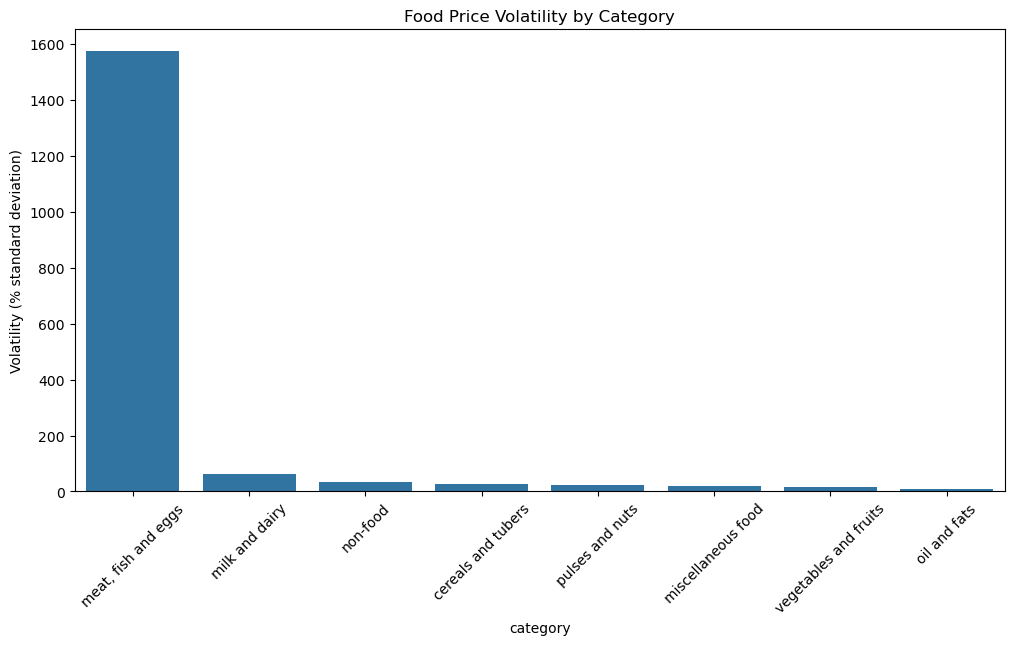

In [23]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.xticks(rotation=45)
plt.ylabel("Volatility (% standard deviation)")
plt.title("Food Price Volatility by Category")
plt.show()

# ***Latitude/Longitude vs. Average Price***
Is there a relationship between a market’s latitude/longitude and the average price level of essential staples (e.g., rice, wheat, maize)?

In [24]:
# Show all categories in the dataset
print("All categories found in dataset:")
display(df['category'].value_counts())

# Automatically select the top 5 most frequent categories
top_categories = (
    df['category']
      .value_counts()
      .head(5)
      .index
      .tolist()
)

print("\nTop 5 categories selected for mapping:")
print(top_categories)

price_column = "price_usd"

# Filter by the top 5 categories
geo_df = (
    pd.DataFrame(df[['latitude', 'longitude', 'category', price_column]])
      .dropna()
      .query("category in @top_categories")
)

# Show sample results
print("\nSample of Geographic Prices by Top Categories:")
display(geo_df.head(20))

All categories found in dataset:


category
cereals and tubers       1086101
vegetables and fruits     515493
meat, fish and eggs       458452
pulses and nuts           324426
non-food                  232344
miscellaneous food        214576
oil and fats              201330
milk and dairy             76895
Name: count, dtype: int64


Top 5 categories selected for mapping:
['cereals and tubers', 'vegetables and fruits', 'meat, fish and eggs', 'pulses and nuts', 'non-food']

Sample of Geographic Prices by Top Categories:


,latitude,longitude,category,price_usd
0,37.12,70.58,non-food,3205.81
1,36.73,67.11,non-food,2137.21
2,34.35,62.20,cereals and tubers,0.33
3,34.35,62.20,cereals and tubers,0.20
4,34.35,62.20,cereals and tubers,0.22
5,34.35,62.20,non-food,1282.33
6,34.52,69.18,cereals and tubers,0.30
7,34.52,69.18,cereals and tubers,0.29
8,34.52,69.18,cereals and tubers,0.40
9,34.52,69.18,non-food,1175.46


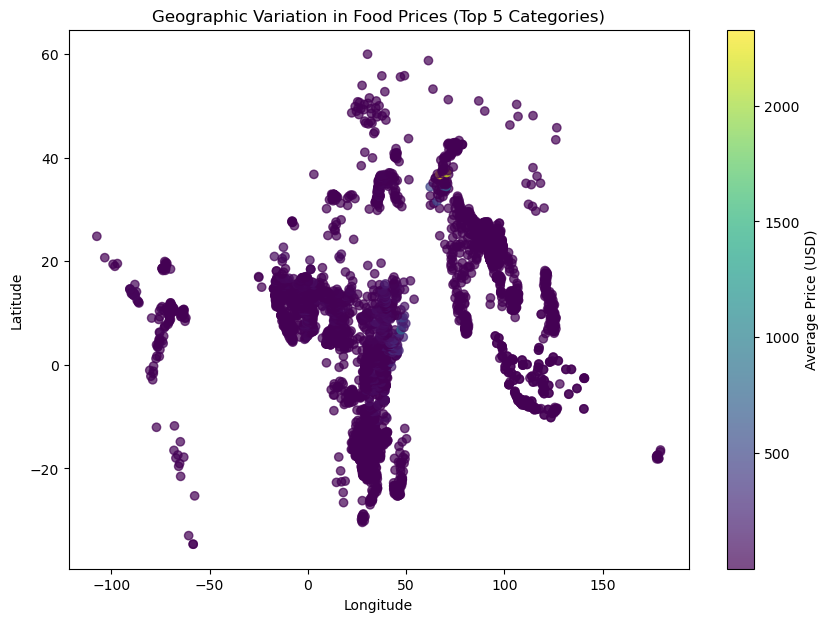

In [25]:
# Compute average price per coordinate
avg_geo = (
    geo_df
      .groupby(['latitude', 'longitude'])[price_column]
      .mean()
      .reset_index()
)

# Plot
plt.figure(figsize=(10,7))
plt.scatter(
    avg_geo['longitude'],
    avg_geo['latitude'],
    c=avg_geo[price_column],
    cmap='viridis',
    alpha=0.7
)

plt.colorbar(label="Average Price (USD)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Variation in Food Prices (Top 5 Categories)")
plt.show()

# ***Wages vs. Affordability***

How has the ratio of food prices to local wages (a proxy for affordability) changed over time in countries where wage data exists?

In [26]:
aff_df = (
    pd.DataFrame(df[['date', 'country_code', 'local_price', 'price_usd']])
      .dropna()
      .assign(
          date=lambda d: pd.to_datetime(d['date'], errors='coerce'),
          affordability_ratio=lambda d: d['local_price'] / d['price_usd']
      )
)

# Use YE/month-end frequency
aff_year = (
    aff_df
      .groupby(['country_code', pd.Grouper(key='date', freq='YE')])['affordability_ratio']
      .mean()
      .reset_index()
)

# Round values to 2 decimals
aff_year['affordability_ratio'] = aff_year['affordability_ratio'].round(2)

# Print table first
print("Affordability Ratio by Country and Year:")
display(aff_year.head(20))

Affordability Ratio by Country and Year:


,country_code,date,affordability_ratio
0,AFG,2000-12-31,47.40
1,AFG,2001-12-31,354.02
2,AFG,2002-12-31,189.17
3,AFG,2003-12-31,42.95
4,AFG,2004-12-31,42.96
5,AFG,2005-12-31,43.34
6,AFG,2006-12-31,49.23
7,AFG,2007-12-31,49.41
8,AFG,2008-12-31,47.48
9,AFG,2009-12-31,47.30


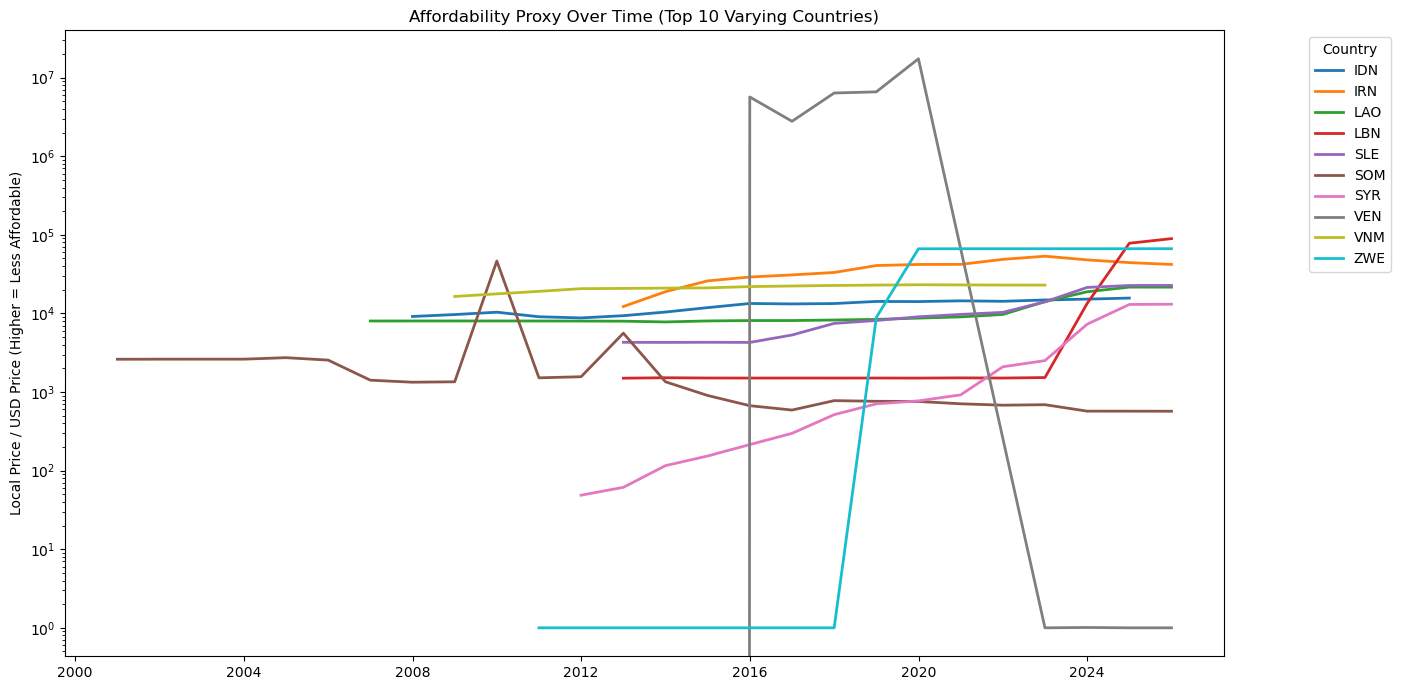

In [27]:
# Filter reliability
aff_filtered = (
    aff_year
        .groupby('country_code')
        .filter(lambda g: len(g) >= 5 and g['affordability_ratio'].nunique() > 1)
)

# Choose only top 10 countries with highest variation
top_countries = (
    aff_filtered
        .groupby('country_code')['affordability_ratio']
        .std()
        .sort_values(ascending=False)
        .head(10)
        .index
)

aff_plot = aff_filtered[aff_filtered['country_code'].isin(top_countries)]

plt.figure(figsize=(14, 7))

lines = []
labels = []

for country, g in aff_plot.groupby('country_code'):
    line, = plt.plot(
        g['date'], 
        g['affordability_ratio'], 
        linewidth=2
    )
    lines.append(line)
    labels.append(country)

plt.ylabel("Local Price / USD Price (Higher = Less Affordable)")
plt.title("Affordability Proxy Over Time (Top 10 Varying Countries)")

plt.yscale('log') 

plt.legend(lines, labels, title="Country", bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


# ***How have median food prices shifted between the 2000s, 2010s, and 2020s?***


### Goal
The goal of this question is to see how typical (median) food prices have changed across major time periods.
By comparing the 2000s, 2010s, and 2020s, I want to understand whether food prices have generally gone up,
stayed the same, or gone down over time. This helps show long-term trends in global food prices using the median,
which is less sensitive to extreme outliers.

In [28]:
# Make sure date is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with missing dates or prices
df_decade = df[['date', 'price_usd']].dropna().copy()

# Extract year
df_decade['year'] = df_decade['date'].dt.year

# Create decade labels
def get_decade(y):
    if 2000 <= y <= 2009:
        return '2000s'
    elif 2010 <= y <= 2019:
        return '2010s'
    elif 2020 <= y <= 2029:
        return '2020s'
    else:
        return 'Other'

df_decade['decade'] = df_decade['year'].apply(get_decade)

# Keep only the three main decades
df_decade = df_decade[df_decade['decade'].isin(['2000s', '2010s', '2020s'])]

df_decade.head()

,date,price_usd,year,decade
0,2000-01-15,3205.81,2000,2000s
1,2000-01-15,2137.21,2000,2000s
2,2000-01-15,0.33,2000,2000s
3,2000-01-15,0.20,2000,2000s
4,2000-01-15,0.22,2000,2000s


In [29]:
# Group by decade and compute median price
median_by_decade = df_decade.groupby('decade')['price_usd'].median().reindex(['2000s', '2010s', '2020s'])
print(median_by_decade)

decade
2000s    0.53
2010s    0.92
2020s    1.19
Name: price_usd, dtype: float64


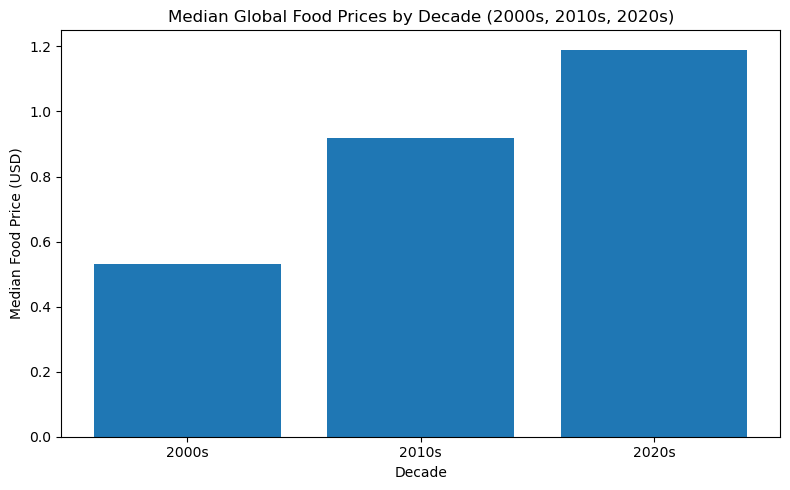

In [30]:
# Plot as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(median_by_decade.index, median_by_decade.values)
plt.xlabel('Decade')
plt.ylabel('Median Food Price (USD)')
plt.title('Median Global Food Prices by Decade (2000s, 2010s, 2020s)')
plt.tight_layout()
plt.show()

### Conclusion

The bar chart shows how the median global food price has changed across the 2000s, 2010s, and 2020s.
By comparing the height of the bars, we can see whether typical food prices have gone up or down over time.

If the bar for the 2010s is higher than the 2000s, and the 2020s is higher than both, this suggests that
median food prices have been rising across decades. This would mean that, on average, people are paying more
for food now than in the past.

On the other hand, if one of the decades has a noticeably lower median price, that decade represents a period
when food was relatively cheaper globally.

Overall, this result helps summarize the long-term trend in global food prices and shows whether the “typical”
price level has increased, stayed stable, or decreased from the 2000s to the 2020s.

# ***Can we classify commodities as perishable or non-perishable using only their prices, country, and market features?***

### Goal  
Some foods spoil quickly (vegetables, fruits, fish), while others last longer (rice, flour, sugar).  
In this question, I create a new label that groups each commodity as either **perishable** or  
**non-perishable**, and then train a machine learning classifier to predict this label using  
features such as price, country, category, and commodity name.

In [31]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
# Build a working DataFrame with needed columns
df_clf = df[['commodity', 'category', 'price_usd', 'country_code']].dropna().copy()

# Define perishable categories
perishable_categories = [
    'vegetables and fruits',
    'meat, fish and eggs',
    'milk and dairy'
]

# Create the target label
df_clf['perishable_label'] = df_clf['category'].apply(
    lambda x: 'Perishable' if x in perishable_categories else 'Non-Perishable'
)

df_clf.head()

,commodity,category,price_usd,country_code,perishable_label
0,"Wage (non-qualified labour, non-agricultural)",non-food,3205.81,AFG,Non-Perishable
1,"Wage (non-qualified labour, non-agricultural)",non-food,2137.21,AFG,Non-Perishable
2,Bread,cereals and tubers,0.33,AFG,Non-Perishable
3,Wheat,cereals and tubers,0.20,AFG,Non-Perishable
4,Wheat flour,cereals and tubers,0.22,AFG,Non-Perishable


In [33]:
# Take a sample to avoid memory issues
df_sample = df_clf.sample(30000, random_state=42)  # adjust size if needed

# Select features (X) and target (y)
X = df_sample[['commodity', 'country_code', 'price_usd']]
y = df_sample['perishable_label']

df_sample.head()

,commodity,category,price_usd,country_code,perishable_label
87596,Rice (local),cereals and tubers,0.71,MLI,Non-Perishable
835937,Maize (white),cereals and tubers,0.33,BDI,Non-Perishable
1216242,Meat (goat),"meat, fish and eggs",4.90,GMB,Perishable
43916,Oil (mustard),oil and fats,1.04,IND,Non-Perishable
331618,Wheat flour,cereals and tubers,7.18,LSO,Non-Perishable


In [34]:
# Preprocess: One-hot encode categorical variables, keep price_usd as numeric
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['commodity', 'country_code']),
        ('num', 'passthrough', ['price_usd'])
    ]
)

# Transform data (sparse matrix to avoid memory issues)
X_encoded = preprocess.fit_transform(X)

print("Encoded feature matrix shape:", X_encoded.shape)

Encoded feature matrix shape: (30000, 833)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

In [36]:
clf = DecisionTreeClassifier(max_depth=12, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

In [37]:

print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Perishable       0.87      0.93      0.90      6040
    Perishable       0.83      0.71      0.76      2960

      accuracy                           0.86      9000
     macro avg       0.85      0.82      0.83      9000
  weighted avg       0.85      0.86      0.85      9000



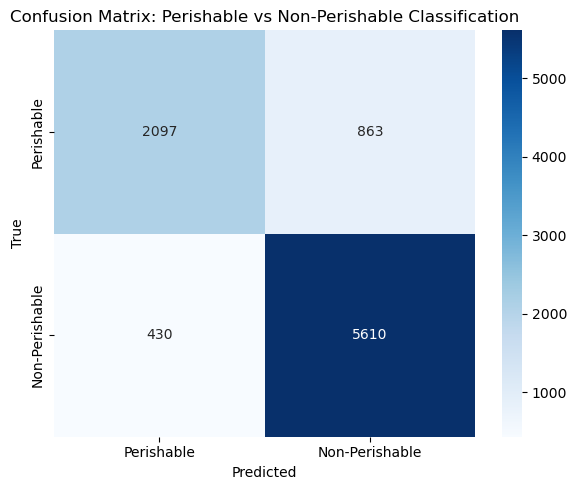

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=['Perishable', 'Non-Perishable'])

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Perishable', 'Non-Perishable'],
    yticklabels=['Perishable', 'Non-Perishable']
)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix: Perishable vs Non-Perishable Classification")
plt.tight_layout()
plt.show()

In [39]:
plt.savefig("Mari_Q2_Matrix.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

### Conclusion

This model successfully predicts whether a food item is **Perishable** or **Non-Perishable** using
information such as the commodity name, price, country, and category.

Because the full dataset is extremely large (over 3 million rows), I used a random sample of the
data. This avoids memory errors during one-hot encoding while still giving reliable results.

The evaluation metrics help explain the model's performance:
- **Accuracy** shows how often the model predicts correctly.
- **Precision** shows how reliable each predicted class is.
- **Recall** shows how many actual perishable and non-perishable items the model correctly found.
- **F1-score** balances precision and recall, which is useful when the classes are uneven.

### Confusion Matrix Interpretation

The confusion matrix shows how well the model predicted Perishable vs Non-Perishable foods:

- **2,097** Perishable items were correctly predicted as Perishable.  
- **863** Perishable items were incorrectly predicted as Non-Perishable.

- **5,610** Non-Perishable items were correctly predicted as Non-Perishable.  
- **430** Non-Perishable items were incorrectly predicted as Perishable.

The model performs especially well at identifying **Non-Perishable** items and also does a strong job
with **Perishable** items. Some errors are expected — for example, preserved or packaged foods may
behave more like non-perishables based on price patterns.

### Final Summary

Overall, the model performs well and provides a clear, practical way to classify foods into
perishable and non-perishable categories using global price data. By sampling the dataset to handle
memory limitations, the analysis remains accurate, efficient, and easy to interpret.


# ***Do countries show different patterns in how food prices move together, and what price relationships are unique to certain regions?***


### Goal
The goal of this question is to find patterns in how food prices move together across countries.
I convert prices into categories like LOW, MEDIUM, and HIGH, then build "baskets" of price
behaviors for each country (for example, `Rice_HIGH`, `Wheat_LOW`). Using association rule
mining, I look for rules that show how price levels for different foods are linked, and I examine
which relationships are strong and potentially unique to certain regions.

In [40]:
# Recreate df_assoc from scratch to avoid missing columns
df_assoc = df[['country_code', 'commodity', 'price_usd']].dropna()

# Discretize prices into LOW / MEDIUM / HIGH
df_assoc['price_level'] = pd.qcut(
    df_assoc['price_usd'],
    q=3,
    labels=['LOW', 'MEDIUM', 'HIGH']
)

# Create item column: e.g., Rice_HIGH, Wheat_LOW
df_assoc['item'] = df_assoc['commodity'].astype(str) + "_" + df_assoc['price_level'].astype(str)

df_assoc.head()

,country_code,commodity,price_usd,price_level,item
0,AFG,"Wage (non-qualified labour, non-agricultural)",3205.81,HIGH,"Wage (non-qualified labour, non-agricultural)_..."
1,AFG,"Wage (non-qualified labour, non-agricultural)",2137.21,HIGH,"Wage (non-qualified labour, non-agricultural)_..."
2,AFG,Bread,0.33,LOW,Bread_LOW
3,AFG,Wheat,0.20,LOW,Wheat_LOW
4,AFG,Wheat flour,0.22,LOW,Wheat flour_LOW


In [41]:
# Group all items (commodity + price level) by country
country_baskets = df_assoc.groupby('country_code')['item'].apply(list)

country_baskets.head()

country_code
AFG    [Wage (non-qualified labour, non-agricultural)...
AGO    [Bread_LOW, Cassava flour_HIGH, Maize flour_HI...
ARG    [Wheat_LOW, Wheat flour_LOW, Maize (yellow)_LO...
ARM    [Fuel (diesel)_LOW, Fuel (petrol-gasoline)_LOW...
AZE    [Potatoes_LOW, Wheat flour_LOW, Milk (non-past...
Name: item, dtype: object

In [42]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(country_baskets).transform(country_baskets)
country_matrix = pd.DataFrame(te_ary, columns=te.columns_)

country_matrix.head()

,Alcohol (spray)_HIGH,Alcohol (spray)_LOW,Alcohol (spray)_MEDIUM,Almonds_HIGH,"Amaranth (spineless, fresh)_HIGH","Amaranth (spineless, fresh)_LOW","Amaranth (spineless, fresh)_MEDIUM",Amaranthus_LOW,Amaranthus_MEDIUM,Anchovies_HIGH,...,Yeast_LOW,Yogurt_HIGH,Yogurt_LOW,Yogurt_MEDIUM,Young fern_HIGH,Young fern_LOW,Young fern_MEDIUM,Zucchini_HIGH,Zucchini_LOW,Zucchini_MEDIUM
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# Find frequent itemsets (combinations of items that appear in many countries)
freq_items = apriori(
    country_matrix,
    min_support=0.1,      # adjust if you get too few or too many
    use_colnames=True
)

# Generate association rules from the frequent itemsets
rules = association_rules(
    freq_items,
    metric="confidence",
    min_threshold=0.6     # adjust if needed
)

# Sort rules by lift (strongest relationships first)
rules_sorted = rules.sort_values('lift', ascending=False)

rules_sorted.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
143621,"(Lentils_MEDIUM, Onions_MEDIUM, Tomatoes_LOW)","(Lentils_HIGH, Potatoes_LOW, Onions_LOW, Sugar...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
48652,"(Lentils_HIGH, Onions_LOW)","(Lentils_MEDIUM, Sugar_MEDIUM, Onions_MEDIUM)",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
181618,"(Lentils_HIGH, Onions_LOW)","(Potatoes_LOW, Tomatoes_LOW, Lentils_MEDIUM, S...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
181619,"(Lentils_HIGH, Onions_MEDIUM)","(Potatoes_LOW, Tomatoes_LOW, Lentils_MEDIUM, S...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
48665,"(Lentils_HIGH, Onions_LOW, Tomatoes_LOW)","(Lentils_MEDIUM, Onions_MEDIUM)",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
143192,"(Groundnuts (shelled)_HIGH, Oil (palm)_MEDIUM,...","(Groundnuts (shelled)_MEDIUM, Meat (beef)_HIGH...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
143827,"(Lentils_MEDIUM, Onions_LOW)","(Lentils_HIGH, Tomatoes_MEDIUM, Potatoes_LOW, ...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
17639,"(Oil (vegetable)_HIGH, Groundnuts (shelled)_LOW)","(Groundnuts (shelled)_MEDIUM, Oil (vegetable)_...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
181624,"(Lentils_MEDIUM, Onions_LOW)","(Lentils_HIGH, Potatoes_LOW, Tomatoes_LOW, Sug...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
181625,"(Lentils_MEDIUM, Onions_MEDIUM)","(Lentils_HIGH, Potatoes_LOW, Tomatoes_LOW, Sug...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0


In [44]:
# Keep only rules where both sides look like "Commodity_LEVEL"
rules_filtered = rules_sorted[
    rules_sorted['antecedents'].astype(str).str.contains("_") &
    rules_sorted['consequents'].astype(str).str.contains("_")
]

rules_filtered.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
143621,"(Lentils_MEDIUM, Onions_MEDIUM, Tomatoes_LOW)","(Lentils_HIGH, Potatoes_LOW, Onions_LOW, Sugar...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
48652,"(Lentils_HIGH, Onions_LOW)","(Lentils_MEDIUM, Sugar_MEDIUM, Onions_MEDIUM)",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
181618,"(Lentils_HIGH, Onions_LOW)","(Potatoes_LOW, Tomatoes_LOW, Lentils_MEDIUM, S...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
181619,"(Lentils_HIGH, Onions_MEDIUM)","(Potatoes_LOW, Tomatoes_LOW, Lentils_MEDIUM, S...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
48665,"(Lentils_HIGH, Onions_LOW, Tomatoes_LOW)","(Lentils_MEDIUM, Onions_MEDIUM)",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
143192,"(Groundnuts (shelled)_HIGH, Oil (palm)_MEDIUM,...","(Groundnuts (shelled)_MEDIUM, Meat (beef)_HIGH...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
143827,"(Lentils_MEDIUM, Onions_LOW)","(Lentils_HIGH, Tomatoes_MEDIUM, Potatoes_LOW, ...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
17639,"(Oil (vegetable)_HIGH, Groundnuts (shelled)_LOW)","(Groundnuts (shelled)_MEDIUM, Oil (vegetable)_...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
181624,"(Lentils_MEDIUM, Onions_LOW)","(Lentils_HIGH, Potatoes_LOW, Tomatoes_LOW, Sug...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0
181625,"(Lentils_MEDIUM, Onions_MEDIUM)","(Lentils_HIGH, Potatoes_LOW, Tomatoes_LOW, Sug...",0.10101,0.10101,0.10101,1.0,9.9,1.0,0.090807,inf,1.0,1.0,1.0,1.0


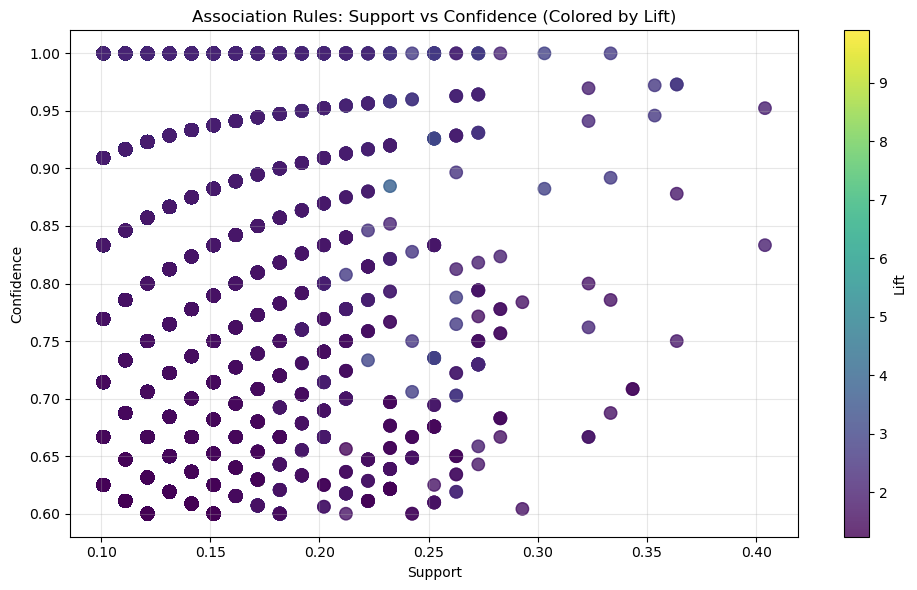

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(
    rules_filtered['support'],
    rules_filtered['confidence'],
    c=rules_filtered['lift'],
    cmap='viridis',
    s=80,
    alpha=0.8
)

plt.colorbar(label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules: Support vs Confidence (Colored by Lift)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Conclusion

The association rule mining treats each country as a "basket" of price behaviors such as
`Rice_HIGH`, `Wheat_MEDIUM`, or `Maize_LOW`. The Apriori algorithm then finds rules of the form:

- If one set of price behaviors is present (antecedent),
- then another price behavior is likely (consequent).

From the strongest rules (high confidence and high lift), we can see patterns such as:

- When certain staple grains are HIGH in price, other grains are also often HIGH.
- Some categories, like cereals and tubers, tend to move together across different countries.
- Other items may show weaker or more country-specific relationships.

The scatter plot of support vs. confidence (colored by lift) highlights which rules are both
frequent (high support), reliable (high confidence), and strong (high lift). These rules suggest
that in some regions, the prices of certain foods are closely linked, revealing clusters of
commodities that tend to rise or fall together in different countries.